In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
tweets = pd.read_csv('Tweets.csv')
tweets.head()#text and airline sentiment

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [7]:
mydf = tweets.loc[:,['text','airline_sentiment']]
mydf.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [11]:
mydf.text.unique()

array(['@VirginAmerica What @dhepburn said.',
       "@VirginAmerica plus you've added commercials to the experience... tacky.",
       "@VirginAmerica I didn't today... Must mean I need to take another trip!",
       ...,
       '@AmericanAir Please bring American Airlines to #BlackBerry10',
       "@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??",
       '@AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?'],
      dtype=object)

In [13]:
sample_text = "@VirginAmerica plus you've added commercials to the experience... tacky."

import re 
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords

stop_words = stopwords.words('english')

print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/devsooryamuthukumar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
words = sample_text.split()

newtext = ' '.join([word for word in words if word not in stop_words])

In [25]:
newtext

'@VirginAmerica plus added commercials experience... tacky.'

In [27]:
def remove_stop(text):
    text = text.lower()
    words = text.split()
    newtext = ' '.join([word for word in words if word not in stop_words])
    return newtext

In [39]:
def clean_text(text):
    text = text.lower()
    #text = re.findall('@\w+|[^a-zA-Z\s]',text)
    text = re.sub('@\w+|[^a-zA-Z\s]','',text)
    text = re.sub('\s+',' ',text)#addln whitespace character
    return(text.strip())
print(clean_text(newtext))
    

plus added commercials experience tacky


In [33]:
def preview(text):
    text = re.findall('@\w+|[^a-zA-Z\s]',text)
    return text

mydf['noise'] = mydf.text.apply(preview)

mynoise = set(char for sublist in mydf.noise in mydf.noise for char in sublist)
sorted_noise = sorted(mynoise)
print(sorted_noise

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '=', '?', '@', '@0xjared', '@10AM', '@12am', '@2littlebirds', '@3', '@41CGQueen', '@44Stocker', '@4geiger', '@5', '@930', '@9NEWS', '@AARP', '@ABC', '@ABC11_WTVD', '@ABCNetwork', '@ALSTDI', '@ALfamilyoffour', '@AMiltx3', '@ATWOnline', '@AUStinAirport', '@AUmilo1', '@A_Life_Story_', '@ActingOutMgmnt', '@Active_Aly', '@Adam_Karren', '@Addair', '@AdmiralsClub', '@AerocivilCol', '@AggieMensGolf', '@AirCanada', '@AirNZUSA', '@AirSouthwest', '@AirTahitiNui', '@Airbus', '@AirlineAdviser', '@AirlineGeeks', '@AlaskaAir', '@AlbertBreer', '@AllegiantTravel', '@Amagrino', '@AmericanAir', '@AmericanAirBR', '@Analystdoc', '@AndrewBiga', '@AndrewFallis', '@Andrew_Wasila', '@AnnetteNaif', '@Apollochplayers', '@ArminRosen', '@AshevilleAir', '@AshleyKAtherton', '@AskAmex', '@AskPayPal', '@AuroraBIZ', '@Australia', '@B787fans', '@BA_USA', '@BBBNE_SD_KS_IA', '@BBB_media',

In [41]:
def final(text):
    text = text.lower()
    words = text.split()
    text = ' '.join([word for word in words if word not in stop_words])
    text = re.sub('@\w+|[^a-zA-Z\s]','',text)
    text = re.sub('\s+',' ',text)#addln whitespace character
    return(text.strip())

In [43]:
mydf['cleansed_text'] = mydf.text.apply(final)

In [45]:
mydf

,text,airline_sentiment,noise,cleansed_text
0,@VirginAmerica What @dhepburn said.,neutral,"[@VirginAmerica, @dhepburn, .]",said
1,@VirginAmerica plus you've added commercials t...,positive,"[@VirginAmerica, ', ., ., ., .]",plus added commercials experience tacky
2,@VirginAmerica I didn't today... Must mean I n...,neutral,"[@VirginAmerica, ', ., ., ., !]",today must mean need take another trip
3,@VirginAmerica it's really aggressive to blast...,negative,"[@VirginAmerica, ', "", "", ', &, ;]",really aggressive blast obnoxious entertainmen...
4,@VirginAmerica and it's a really big bad thing...,negative,"[@VirginAmerica, ']",really big bad thing
...,...,...,...,...
14635,@AmericanAir thank you we got on a different f...,positive,"[@AmericanAir, .]",thank got different flight chicago
14636,@AmericanAir leaving over 20 minutes Late Flig...,negative,"[@AmericanAir, 2, 0, ., 1, 5, ., ']",leaving minutes late flight warnings communica...
14637,@AmericanAir Please bring American Airlines to...,neutral,"[@AmericanAir, #, 1, 0]",please bring american airlines blackberry
14638,"@AmericanAir you have my money, you change my ...",negative,"[@AmericanAir, ,, ,, ', !, ?, ?]",money change flight answer phones suggestions ...


In [47]:
#text visualization

from  nltk.probability import FreqDist
from nltk.tokenize import word_tokenize #sentence into tokens
nltk.download('punkt_tab')
for word in mydf.cleansed_text:
    for tokens in word_tokenize(word):
        print(tokens)
        
all_tokens = [tokens for word in mydf.cleansed_text for tokens in word_tokenize(word)]
all_tokens




[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/devsooryamuthukumar/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


said
plus
added
commercials
experience
tacky
today
must
mean
need
take
another
trip
really
aggressive
blast
obnoxious
entertainment
guests
faces
amp
little
recourse
really
big
bad
thing
seriously
would
pay
flight
seats
playing
really
bad
thing
flying
va
yes
nearly
every
time
fly
vx
ear
worm
wont
go
away
really
missed
prime
opportunity
men
without
hats
parody
there
httpstcomwpggrezp
well
didntbut
do
d
amazing
arrived
hour
early
good
me
know
suicide
second
leading
cause
death
among
teens
lt
pretty
graphics
much
better
minimal
iconography
d
great
deal
already
thinking
nd
trip
amp
even
gone
st
trip
yet
p
im
flying
fabulous
seductive
skies
again
u
take
stress
away
travel
httptcoahlxhhkiyn
thanks
sfopdx
schedule
still
mia
excited
first
cross
country
flight
lax
mco
ive
heard
nothing
great
things
virgin
america
daystogo
flew
nyc
sfo
last
week
fully
sit
seat
due
two
large
gentleman
either
side
me
help
flying
know
would
amazingly
awesome
bosfll
please
want
fly
you
first
fares
may
three
times
car

['said',
 'plus',
 'added',
 'commercials',
 'experience',
 'tacky',
 'today',
 'must',
 'mean',
 'need',
 'take',
 'another',
 'trip',
 'really',
 'aggressive',
 'blast',
 'obnoxious',
 'entertainment',
 'guests',
 'faces',
 'amp',
 'little',
 'recourse',
 'really',
 'big',
 'bad',
 'thing',
 'seriously',
 'would',
 'pay',
 'flight',
 'seats',
 'playing',
 'really',
 'bad',
 'thing',
 'flying',
 'va',
 'yes',
 'nearly',
 'every',
 'time',
 'fly',
 'vx',
 'ear',
 'worm',
 'wont',
 'go',
 'away',
 'really',
 'missed',
 'prime',
 'opportunity',
 'men',
 'without',
 'hats',
 'parody',
 'there',
 'httpstcomwpggrezp',
 'well',
 'didntbut',
 'do',
 'd',
 'amazing',
 'arrived',
 'hour',
 'early',
 'good',
 'me',
 'know',
 'suicide',
 'second',
 'leading',
 'cause',
 'death',
 'among',
 'teens',
 'lt',
 'pretty',
 'graphics',
 'much',
 'better',
 'minimal',
 'iconography',
 'd',
 'great',
 'deal',
 'already',
 'thinking',
 'nd',
 'trip',
 'amp',
 'even',
 'gone',
 'st',
 'trip',
 'yet',
 'p',


In [51]:
#freq dataframe

pd.DataFrame(FreqDist(all_tokens).items(),columns = ['Tokens','Freq']).\
sort_values(by = 'Freq',ascending = False).head(25)

,Tokens,Freq
29,flight,3895
192,get,1336
98,thanks,1072
457,cancelled,1056
398,service,956
130,help,855
37,time,770
89,im,764
397,customer,746
356,us,706


In [55]:
#custome stoplist

stops = ['ve','http','https','www','u','m','s','i','co','ll','t','w','you']

def remove_customstop(text):
    text = text.lower()
    words = text.split()
    return(' '.join([word for word in words if word not in stops]))

mydf['cleansed'] = mydf['cleansed_text'].apply(remove_customstop)
mydf   

,text,airline_sentiment,noise,cleansed_text,cleansed
0,@VirginAmerica What @dhepburn said.,neutral,"[@VirginAmerica, @dhepburn, .]",said,said
1,@VirginAmerica plus you've added commercials t...,positive,"[@VirginAmerica, ', ., ., ., .]",plus added commercials experience tacky,plus added commercials experience tacky
2,@VirginAmerica I didn't today... Must mean I n...,neutral,"[@VirginAmerica, ', ., ., ., !]",today must mean need take another trip,today must mean need take another trip
3,@VirginAmerica it's really aggressive to blast...,negative,"[@VirginAmerica, ', "", "", ', &, ;]",really aggressive blast obnoxious entertainmen...,really aggressive blast obnoxious entertainmen...
4,@VirginAmerica and it's a really big bad thing...,negative,"[@VirginAmerica, ']",really big bad thing,really big bad thing
...,...,...,...,...,...
14635,@AmericanAir thank you we got on a different f...,positive,"[@AmericanAir, .]",thank got different flight chicago,thank got different flight chicago
14636,@AmericanAir leaving over 20 minutes Late Flig...,negative,"[@AmericanAir, 2, 0, ., 1, 5, ., ']",leaving minutes late flight warnings communica...,leaving minutes late flight warnings communica...
14637,@AmericanAir Please bring American Airlines to...,neutral,"[@AmericanAir, #, 1, 0]",please bring american airlines blackberry,please bring american airlines blackberry
14638,"@AmericanAir you have my money, you change my ...",negative,"[@AmericanAir, ,, ,, ', !, ?, ?]",money change flight answer phones suggestions ...,money change flight answer phones suggestions ...


In [61]:
all_tokens = [tokens for word in mydf.cleansed for tokens in word_tokenize(word)]

freqdf = pd.DataFrame(FreqDist(all_tokens).items(),columns = ['Tokens','Freq']).\
sort_values(by = 'Freq',ascending = False)

freqdf

,Tokens,Freq
29,flight,3895
190,get,1336
97,thanks,1072
455,cancelled,1056
396,service,956
...,...,...
7399,strandednyc,1
7398,handicapped,1
7396,enemy,1
7395,crappiest,1


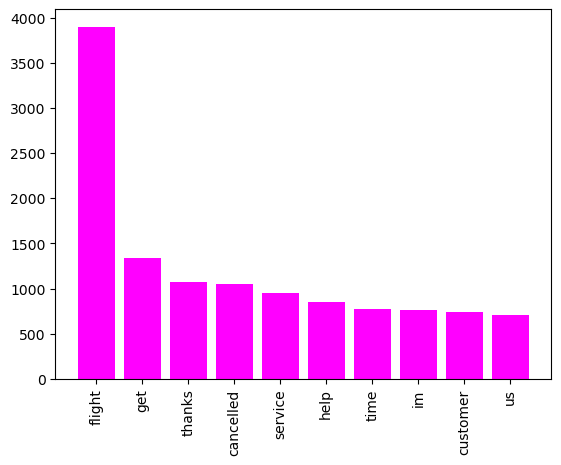

In [63]:
plt.bar(freqdf.Tokens[:10],freqdf.Freq[:10],color = 'magenta')
plt.xticks(rotation = 90)
plt.show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.9/168.9 kB 1.5 MB/s eta 0:00:00a 0:00:01


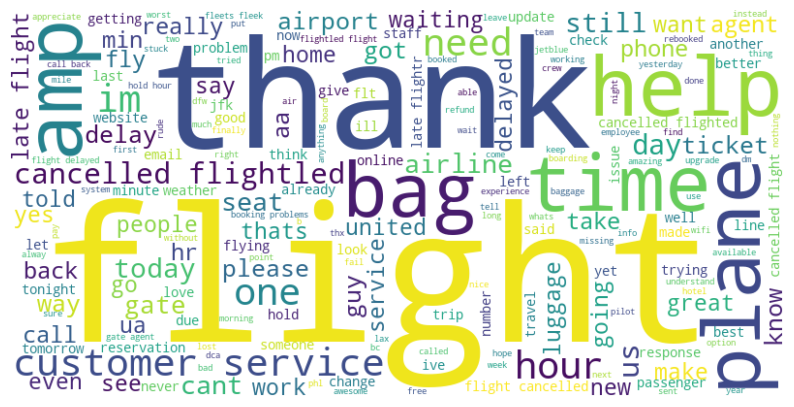

In [71]:
!pip install wordcloud
from wordcloud import WordCloud

wordcloud = WordCloud(height = 400,width = 800,background_color = 'white').\
generate(' '.join(all_tokens))

plt.figure(figsize = (10,10))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')

plt.show()

In [73]:
mydf

,text,airline_sentiment,noise,cleansed_text,cleansed
0,@VirginAmerica What @dhepburn said.,neutral,"[@VirginAmerica, @dhepburn, .]",said,said
1,@VirginAmerica plus you've added commercials t...,positive,"[@VirginAmerica, ', ., ., ., .]",plus added commercials experience tacky,plus added commercials experience tacky
2,@VirginAmerica I didn't today... Must mean I n...,neutral,"[@VirginAmerica, ', ., ., ., !]",today must mean need take another trip,today must mean need take another trip
3,@VirginAmerica it's really aggressive to blast...,negative,"[@VirginAmerica, ', "", "", ', &, ;]",really aggressive blast obnoxious entertainmen...,really aggressive blast obnoxious entertainmen...
4,@VirginAmerica and it's a really big bad thing...,negative,"[@VirginAmerica, ']",really big bad thing,really big bad thing
...,...,...,...,...,...
14635,@AmericanAir thank you we got on a different f...,positive,"[@AmericanAir, .]",thank got different flight chicago,thank got different flight chicago
14636,@AmericanAir leaving over 20 minutes Late Flig...,negative,"[@AmericanAir, 2, 0, ., 1, 5, ., ']",leaving minutes late flight warnings communica...,leaving minutes late flight warnings communica...
14637,@AmericanAir Please bring American Airlines to...,neutral,"[@AmericanAir, #, 1, 0]",please bring american airlines blackberry,please bring american airlines blackberry
14638,"@AmericanAir you have my money, you change my ...",negative,"[@AmericanAir, ,, ,, ', !, ?, ?]",money change flight answer phones suggestions ...,money change flight answer phones suggestions ...


In [75]:
#map the sentiment into 0 12

mapped = {'negative':2,'positive':1,'neutral':0}

mydf['Target'] = mydf.airline_sentiment.map(mapped)

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.metrics import classification_report

x = mydf.cleansed
y = mydf.Target
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.20,random_state=42)

In [89]:
vectorizer = CountVectorizer()

xtrain_cv = vectorizer.fit_transform(xtrain)

xtest_cv = vectorizer.transform(xtest)

In [83]:
model = LogisticRegression()

model.fit(xtrain_cv,ytrain)
pred = model.predict(xtest_cv)

print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.60      0.57      0.59       580
           1       0.77      0.70      0.73       459
           2       0.85      0.89      0.87      1889

    accuracy                           0.80      2928
   macro avg       0.74      0.72      0.73      2928
weighted avg       0.79      0.80      0.79      2928



In [91]:
model = RandomForestClassifier()

model.fit(xtrain_cv,ytrain)
pred = model.predict(xtest_cv)

print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.58      0.50      0.53       580
           1       0.72      0.61      0.66       459
           2       0.82      0.89      0.85      1889

    accuracy                           0.77      2928
   macro avg       0.71      0.67      0.68      2928
weighted avg       0.76      0.77      0.76      2928



In [93]:
vectorizer2 = TfidfVectorizer()

xtrain_cv = vectorizer2.fit_transform(xtrain)

xtest_cv = vectorizer2.transform(xtest)

In [95]:
model = LogisticRegression()

model.fit(xtrain_cv,ytrain)
pred = model.predict(xtest_cv)

print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.67      0.43      0.53       580
           1       0.83      0.62      0.71       459
           2       0.81      0.95      0.87      1889

    accuracy                           0.79      2928
   macro avg       0.77      0.67      0.70      2928
weighted avg       0.78      0.79      0.78      2928



In [99]:
model = RandomForestClassifier(criterion = 'entropy')

model.fit(xtrain_cv,ytrain)
pred = model.predict(xtest_cv)

print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.60      0.45      0.52       580
           1       0.74      0.56      0.64       459
           2       0.81      0.91      0.86      1889

    accuracy                           0.77      2928
   macro avg       0.71      0.64      0.67      2928
weighted avg       0.75      0.77      0.75      2928

